In [2]:
import numpy as np
from numpy import linalg as LA

In [9]:
#gneerate a matrix of ones of size NxN
N = 40
M = np.diag((N,N))

#diagonalize M/N
M_normalized = M/N

#compute the eigenvalues of M_normalized
eigenvalues = LA.eigvals(M_normalized)


In [24]:
def separable_rx_gram_matrix(X, Y, c, method = "FQK"):
    """This function computes the gram matrix for the separable_rx circuit."""
    X = np.array(X)
    Y = np.array(Y)
    n, m = X.shape[0], Y.shape[0]
    n_dimensions = X.shape[1]


    # Reshape X and Y to facilitate broadcasting
    X_reshaped = X[:, np.newaxis, :]
    Y_reshaped = Y[np.newaxis, :, :]

    # Compute the gram matrix using vectorized operations
#    K = np.prod(np.cos(c * (X_reshaped - Y_reshaped) / 2) ** 2, axis=-1)
    if method == "FQK": 
        K = np.prod(np.cos(c * (X_reshaped - Y_reshaped) / 2) ** 2, axis=-1)
    else:
        gamma=1
        #print(n_dimensions)
        #print(np.sum(np.cos(c * (X_reshaped - Y_reshaped)), axis=-1))
        K = np.exp(-2*gamma*n_dimensions)*np.exp(2*gamma*np.sum(np.cos(c * (X_reshaped - Y_reshaped)), axis=-1))

    return K

c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


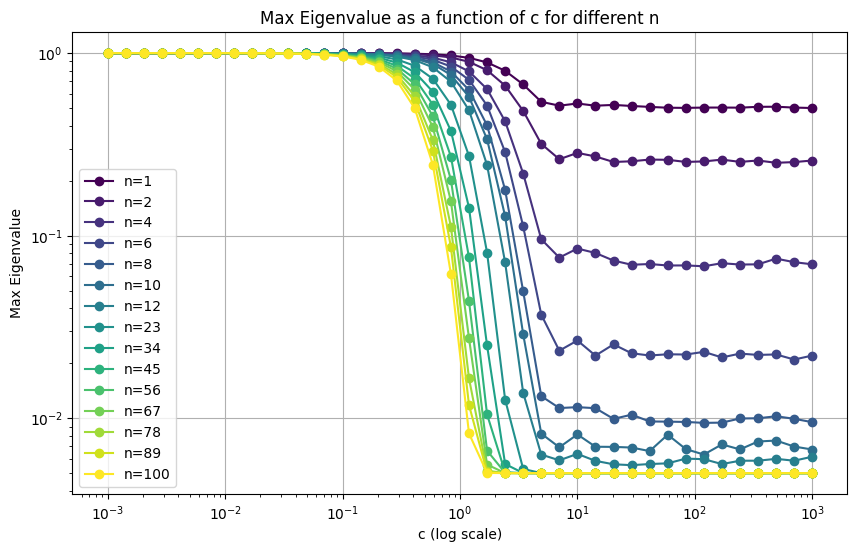

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Define the range of c values in log scale
c_values = np.logspace(-3, 3, num=40)
N = 200
#concatenate with np.linspace(1, 100, num=10, dtype=int) 
n_values = [1, 2, 4, 8, 16, 32]
N_values = [50, 60, 100, 200]

#use a progressive color map
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))

# Initialize a dictionary to store max eigenvalues for each n
max_eigenvalues_dict = {}

for n in n_values:
    X_train = np.random.rand(N, n)
    max_eigenvalues = []

    # Compute the maximum eigenvalue for each c
    for c in c_values:
        K = separable_rx_gram_matrix(X_train * c, X_train * c, 1)
        eigenvalues = LA.eigvals(K / N)
        max_eigenvalues.append(np.max(eigenvalues))

    # Store the max eigenvalues for the current n
    max_eigenvalues_dict[n] = max_eigenvalues




In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd


# Define the range of c values in log scale
c_values = np.logspace(-3, 3, num=40)
N = 200
#concatenate with np.linspace(1, 100, num=10, dtype=int) 
n_values = [1, 2, 4, 8, 16, 32]
N_values = [50, 60, 100, 200]

n_values = np.linspace(1, 100, num=30, dtype=int)
N_values = np.linspace(1, 100, num=30, dtype=int)
N_values = [320]

#use a progressive color map
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))

# Initialize a list to store the results
results = []

#c_values = np.logspace(-3, 3, num=2)

for n in n_values:
    for N in N_values:
        for c in c_values:
            X_train = np.random.rand(N, n)
            
            # Compute the gram matrix
            K = rbf_kernel(X_train * c, X_train * c)
            #K = separable_rx_gram_matrix(X_train * c, X_train * c, 1)
            eigenvalues = LA.eigvals(K / N)
            max_eigenvalue = np.max(eigenvalues)
            varK = np.var(K.flatten())
            
            # Append the results to the list
            results.append({'n': n, 'N': N, 'c': c, 'max_eigenvalue': max_eigenvalue, 'varK': varK})

# Create a pandas dataframe from the results
df_results = pd.DataFrame(results)
df_resultsbigc = df_results[df_results['c'] == 1000]
        # Store the max eigenvalues for the current 

In [116]:
df_resultsbigc["max_eigenvalue"] = df_resultsbigc.apply(lambda x: np.real(x["max_eigenvalue"]), axis=1)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7500\784443924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultsbigc["max_eigenvalue"] = df_resultsbigc.apply(lambda x: np.real(x["max_eigenvalue"]), axis=1)


In [102]:
#import sympy
import sympy as sp

Nsp = sp.symbols('N')
mu = 1/Nsp

eq = (Nsp**2-Nsp)*(mu/Nsp)**2 + Nsp*((1-mu)/Nsp)**2

eq.simplify()


(N - 1)/N**2

In [ ]:
400*

80.0

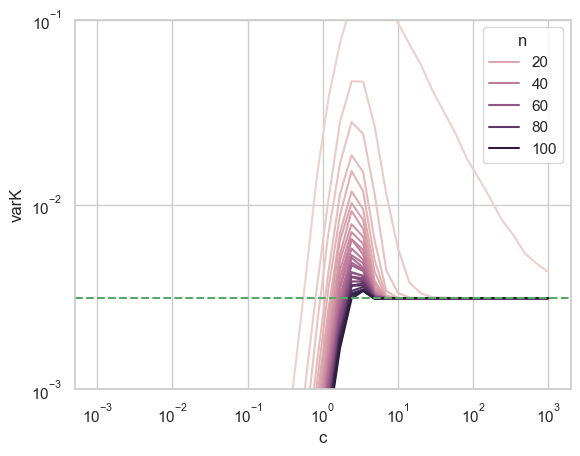

In [118]:
#df_results fixed N
N_ = 320
df_results_fixedN = df_results[df_results['N'] == N_]

sns.lineplot(data=df_results_fixedN, x='c', y='varK', hue='n')
plt.axhline(y=(N_-1)/N_**2, color='g', linestyle='--')
plt.xscale('log')

#ylim (0,0.01)
plt.ylim(0.001,0.1)

plt.yscale('log')

In [68]:
melted

,n,N,metric,value
0,1,1,max_eigenvalue,1.000000
1,1,4,max_eigenvalue,0.587153
2,1,7,max_eigenvalue,0.518842
3,1,11,max_eigenvalue,0.574736
4,1,14,max_eigenvalue,0.502961
...,...,...,...,...
1795,100,86,varK,0.011493
1796,100,89,varK,0.011110
1797,100,93,varK,0.010637
1798,100,96,varK,0.010308


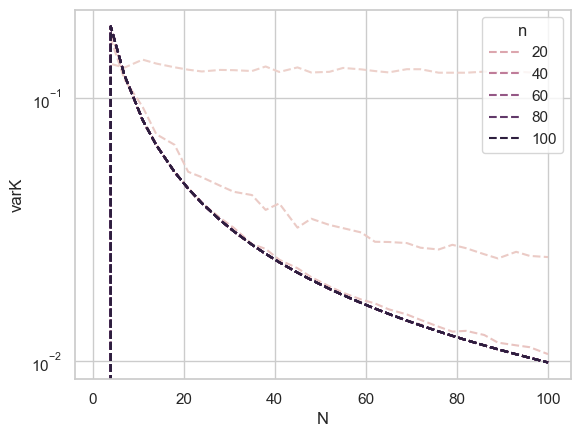

In [88]:
sns.lineplot(data=df_resultsbigc, x='N', y='varK', hue='n', linestyle='--')
#log scale
plt.yscale('log')


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7500\2531381699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultsbigc["theory_max_eigenvalue_N_saturated"] = df_resultsbigc.apply(lambda x: 1/x["N"], axis=1)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_7500\2531381699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultsbigc["theory_max_eigenvalue_n_saturated"] = df_resultsbigc.apply(lambda x: 1/2**x["n"], axis=1)


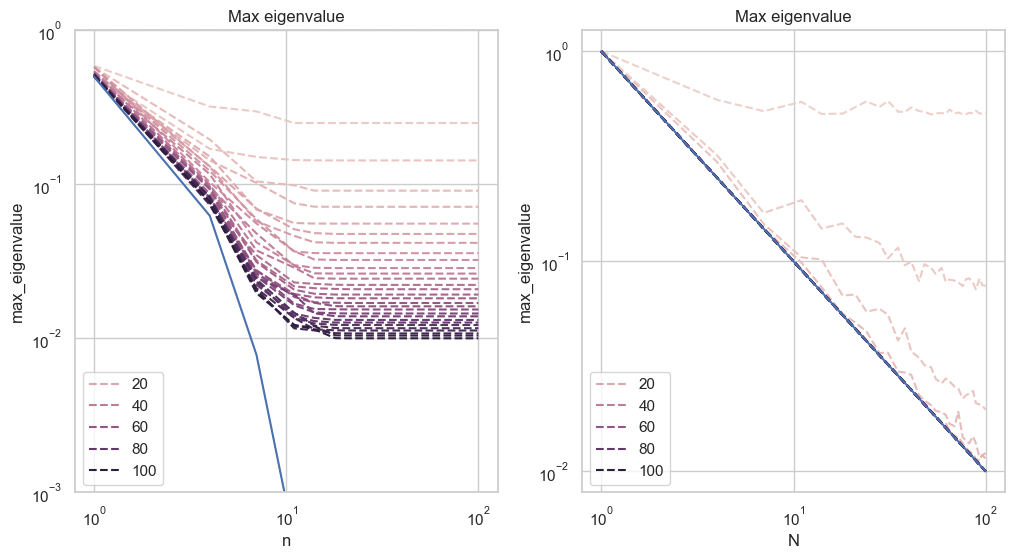

In [83]:
#melted = pd.melt(df_resultsbigc, id_vars=['n', 'N'], value_vars=['max_eigenvalue', 'varK'], var_name='metric', value_name='value')

df_resultsbigc["theory_max_eigenvalue_N_saturated"] = df_resultsbigc.apply(lambda x: 1/x["N"], axis=1)
df_resultsbigc["theory_max_eigenvalue_n_saturated"] = df_resultsbigc.apply(lambda x: 1/2**x["n"], axis=1)

#relplot 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(data=df_resultsbigc, x='n', y='max_eigenvalue', hue='N', ax=axs[0], linestyle='--')
sns.lineplot(data=df_resultsbigc, x='n', y='theory_max_eigenvalue_n_saturated', ax=axs[0], legend="auto")
axs[0].set_title('Max eigenvalue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim([1e-3, 1e0])

sns.lineplot(data=df_resultsbigc, x='N', y='max_eigenvalue', hue='n', ax=axs[1], linestyle='--')
sns.lineplot(data=df_resultsbigc, x='N', y='theory_max_eigenvalue_N_saturated',  ax=axs[1], )
axs[1].set_title('Max eigenvalue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')



c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_r

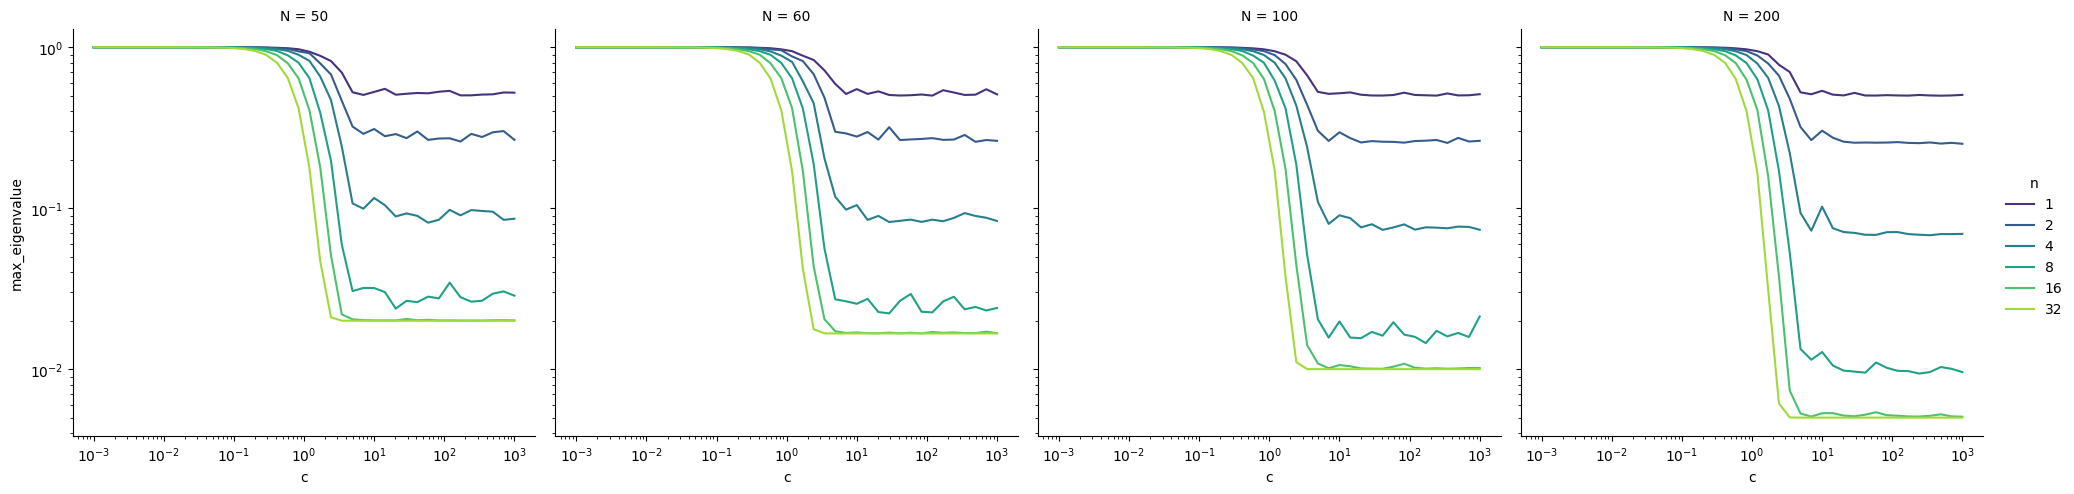

In [43]:
import seaborn as sns
sns.relplot(data=df_results, x='c', y='max_eigenvalue', hue='n', col='N', kind='line', palette=sns.color_palette("viridis", n_colors=len(n_values)), markers=True, dashes=False)

plt.xscale('log')
plt.yscale('log')

c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jsl-rf\Desktop\WinterKernels_debug_organizing_repo\WinterKernels\.venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


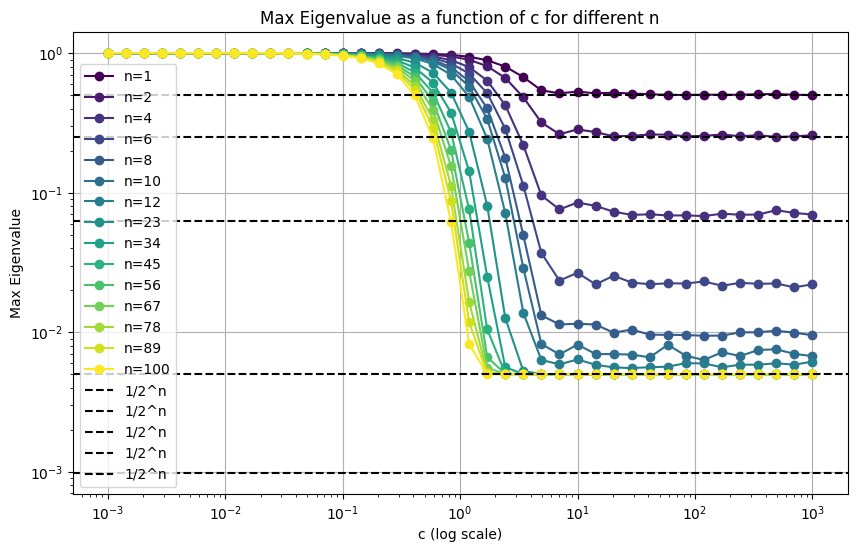

In [39]:
# Plot the results
plt.figure(figsize=(10, 6))

for n, max_eigenvalues in max_eigenvalues_dict.items():
    plt.plot(c_values, max_eigenvalues, marker='o', label=f'n={n}', color=colors[n_values == n][0])

plt.axhline(1/2**1, color='black', linestyle='--', label='1/2^n')
plt.axhline(1/2**2, color='black', linestyle='--', label='1/2^n')
plt.axhline(1/2**4, color='black', linestyle='--', label='1/2^n')
plt.axhline(1/2**10, color='black', linestyle='--', label='1/2^n')

plt.axhline(1/N, color='black', linestyle='--', label='1/2^n')



plt.yscale('log')
plt.xscale('log')
plt.xlabel('c (log scale)')
plt.ylabel('Max Eigenvalue')
plt.title('Max Eigenvalue as a function of c for different n')
plt.grid(True)
plt.legend()
plt.show()

1.0